### U.S. Road Accidents Analysis
#### ML Engineer Details
- Name: Aswini R
- Phone: +919585598626
- Email: aswiniravichandra99@gmail.com

### Purpose:
This Jupyter Notebook analyzes U.S. road accident data to uncover patterns, trends, and insights. It uses data visualization, statistical analysis, and machine learning techniques to understand the key factors contributing to accidents.

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import zipfile
import os

# Define the path to the zip file (adjust the name as per your file)
zip_file_path = "archive.zip"

# Define the extraction directory
extract_to_dir = "./"

# Check if the ZIP file exists
if os.path.exists(zip_file_path):
    # Open the zip file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Extract all the contents into the specified directory
        zip_ref.extractall(extract_to_dir)
        print(f"Files extracted to: {extract_to_dir}")
else:
    print(f"File {zip_file_path} not found!")


Files extracted to: ./


In [3]:
#importing the dataset
df = pd.read_csv('US_Accidents_March23.csv')
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
# Extract all column names
columns = df.columns

# Print the column names
print("Column names:")
print(columns)


Column names:
Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [5]:
# Extract numeric column names
numeric_columns = df.select_dtypes(include=['number']).columns

print("Numeric columns:")
print(numeric_columns)


Numeric columns:
Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)'],
      dtype='object')


In [6]:
# Extract categorical column names
categorical_columns = df.select_dtypes(include=['object']).columns

print("Categorical columns:")
print(categorical_columns)


Categorical columns:
Index(['ID', 'Source', 'Start_Time', 'End_Time', 'Description', 'Street',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Wind_Direction',
       'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')


# Exploratory Data Analysis
- Visualizing accident frequency by time, location, and weather conditions.
- Identifying correlations between accident severity and various factors.


Text(0.5, 1.0, 'Distribution of Severity Classes')

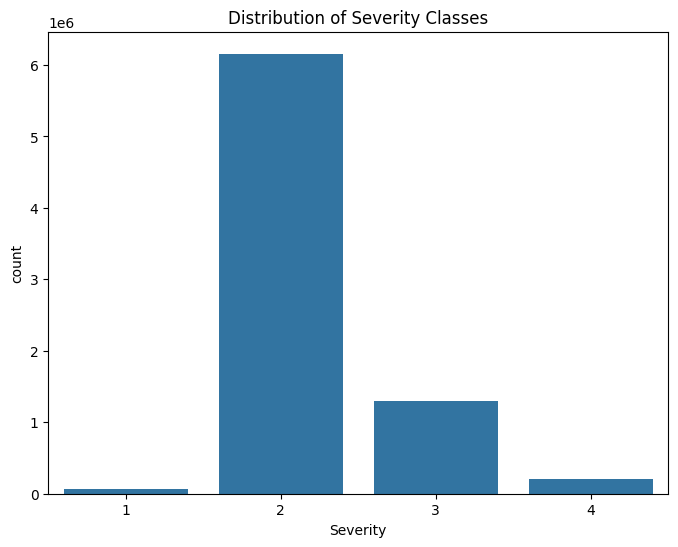

In [7]:
# Visualize distributions of numerical features
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='Severity', data=df)         
plt.title('Distribution of Severity Classes')


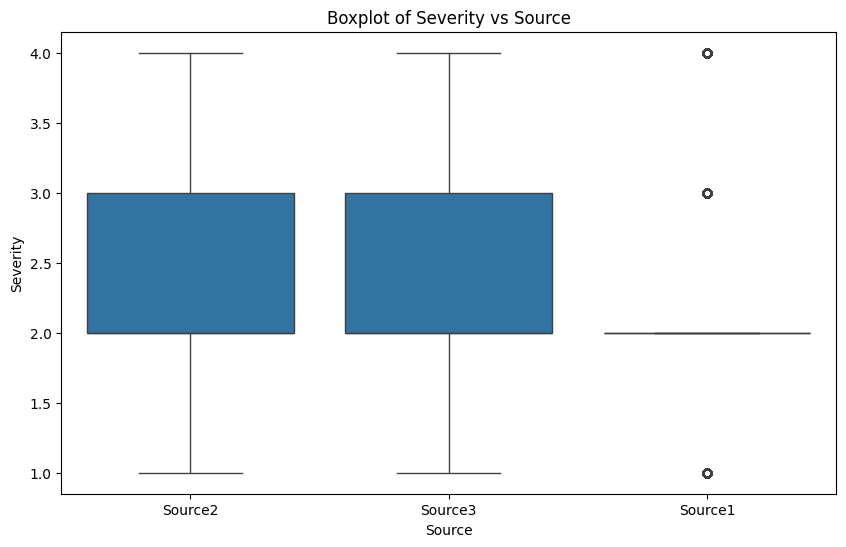

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Source', y='Severity', data=df)
plt.title('Boxplot of Severity vs Source')
plt.show()


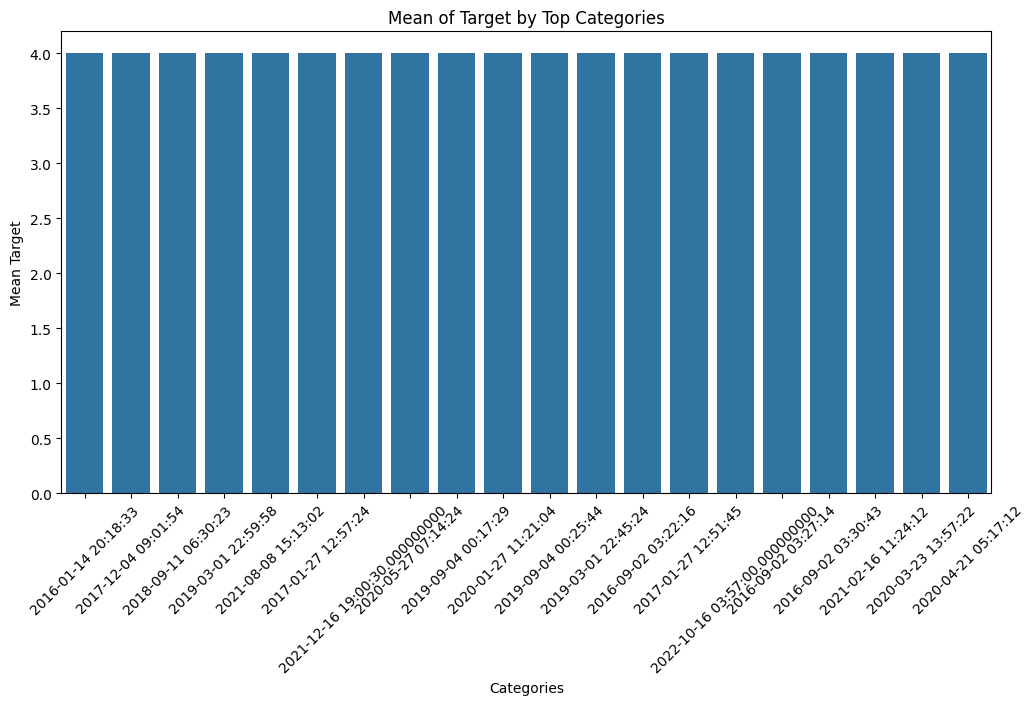

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate statistics (e.g., mean target for each category)
agg_stats = df.groupby('Start_Time')['Severity'].mean().sort_values(ascending=False)

# Select top N categories
top_n = 20
top_categories = agg_stats.head(top_n)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.xticks(rotation=45)
plt.title('Mean of Target by Top Categories')
plt.ylabel('Mean Target')
plt.xlabel('Categories')
plt.show()


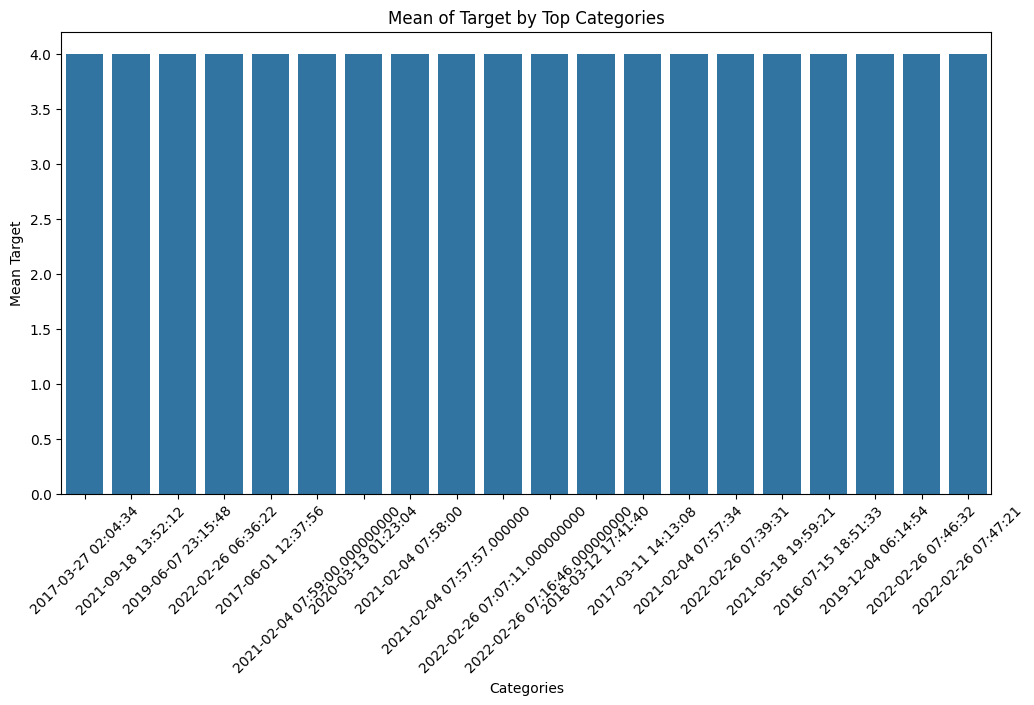

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate statistics (e.g., mean target for each category)
agg_stats = df.groupby('End_Time')['Severity'].mean().sort_values(ascending=False)

# Select top N categories
top_n = 20
top_categories = agg_stats.head(top_n)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.xticks(rotation=45)
plt.title('Mean of Target by Top Categories')
plt.ylabel('Mean Target')
plt.xlabel('Categories')
plt.show()


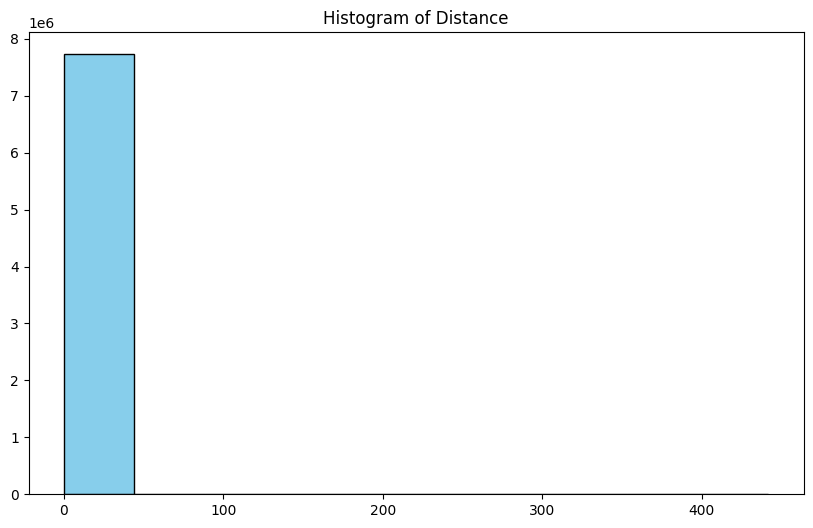

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Distance(mi)'], edgecolor='black', color='skyblue')
plt.title('Histogram of Distance')

#sns.histplot(x='Distance(mi)', data=df, kde=True)
plt.show()


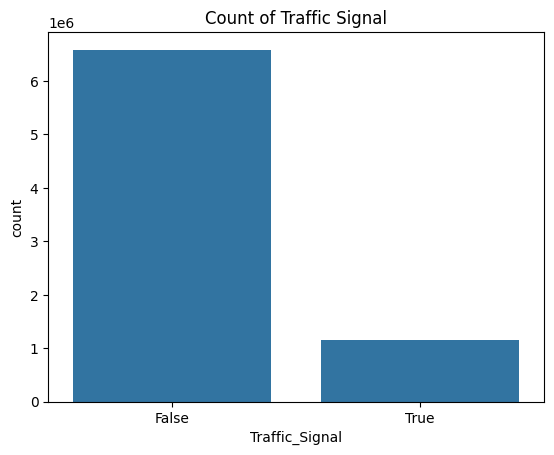

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Traffic_Signal', data=df)
plt.title('Count of Traffic Signal')
plt.show()


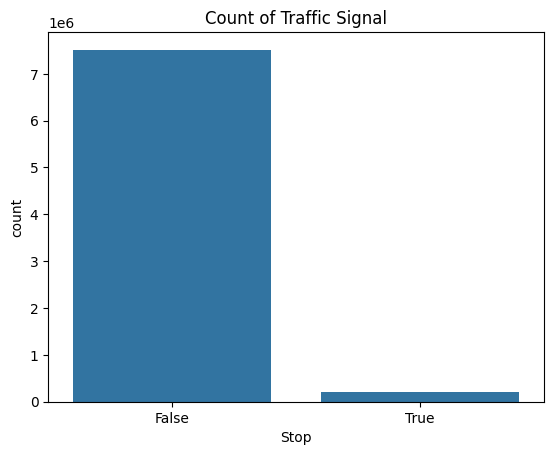

In [13]:
sns.countplot(x='Stop', data=df)
plt.title('Count of Traffic Signal')
plt.show()


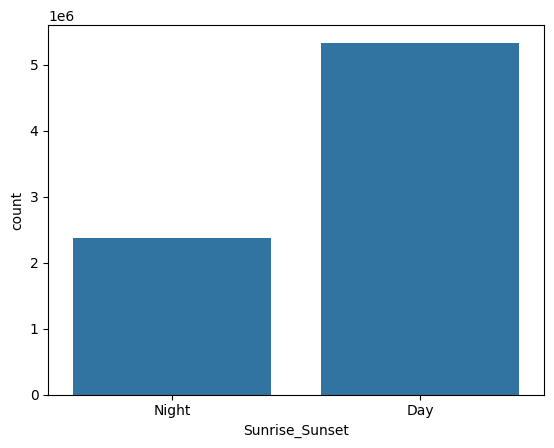

In [14]:
sns.countplot(x='Sunrise_Sunset', data=df)
plt.show()

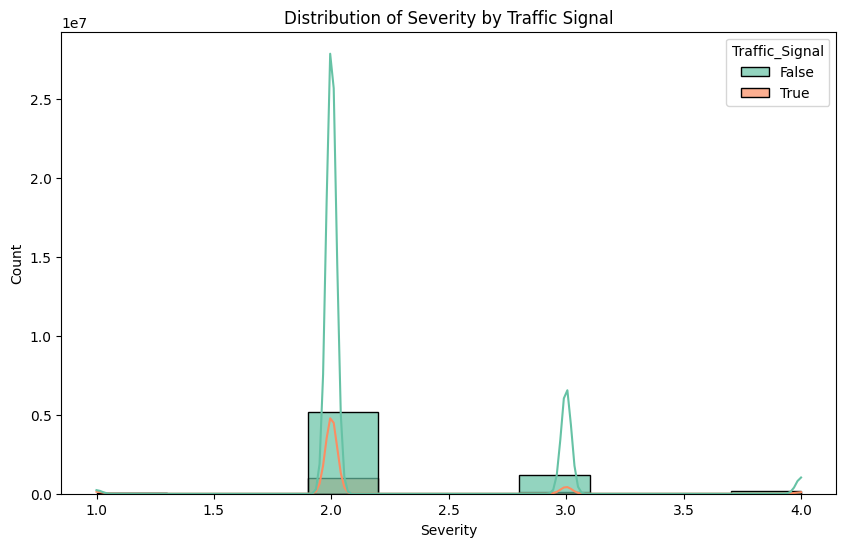

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Severity', hue='Traffic_Signal', kde=True, bins=10, palette='Set2', alpha=0.7)
plt.title('Distribution of Severity by Traffic Signal')
plt.show()


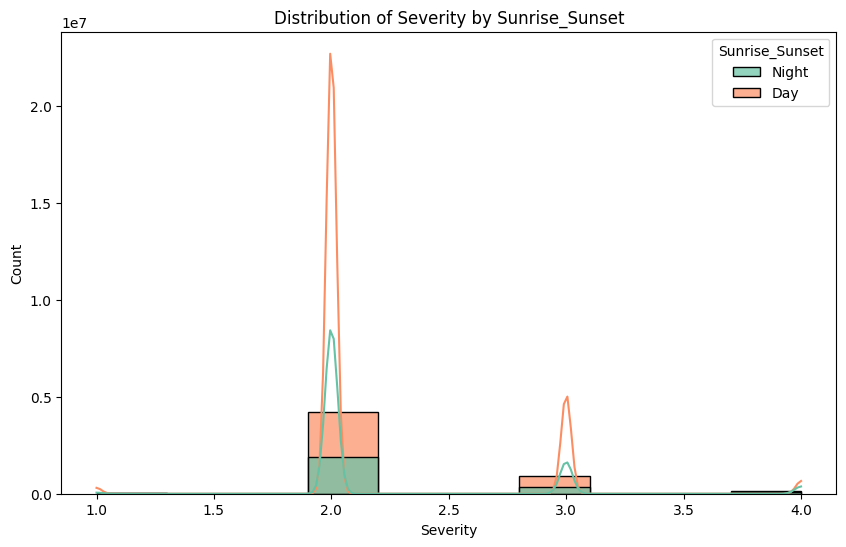

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Severity', hue='Sunrise_Sunset', kde=True, bins=10, palette='Set2', alpha=0.7)
plt.title('Distribution of Severity by Sunrise_Sunset')
plt.show()


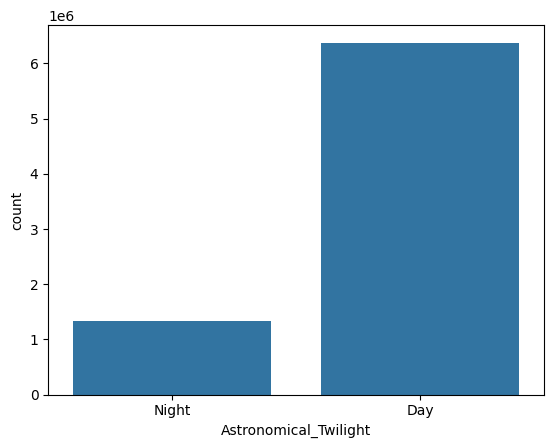

In [17]:
sns.countplot(x='Astronomical_Twilight', data=df)
plt.show()

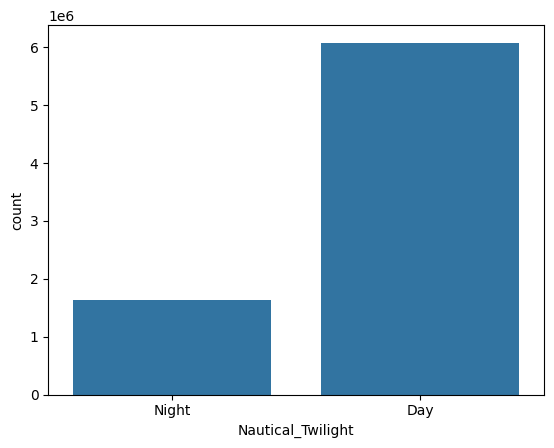

In [18]:
sns.countplot(x='Nautical_Twilight', data=df)
plt.show()

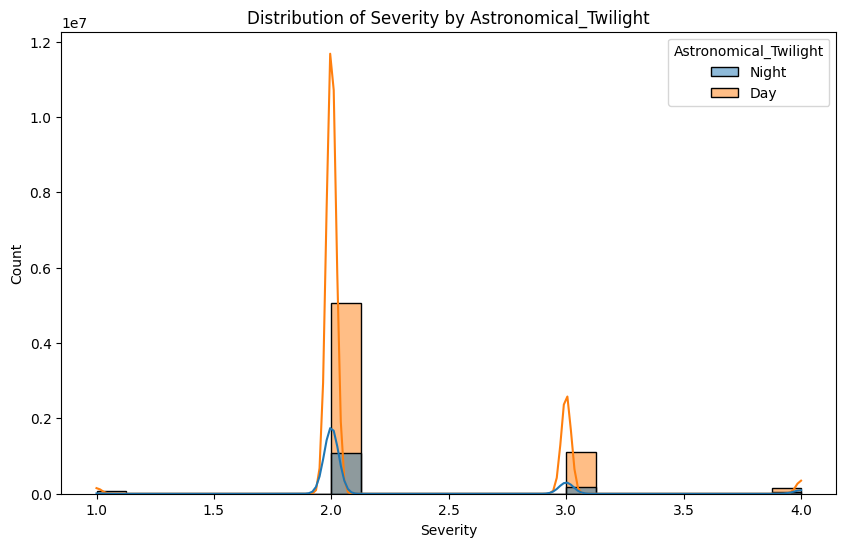

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Severity', hue='Astronomical_Twilight', kde=True)
plt.title('Distribution of Severity by Astronomical_Twilight')
plt.show()


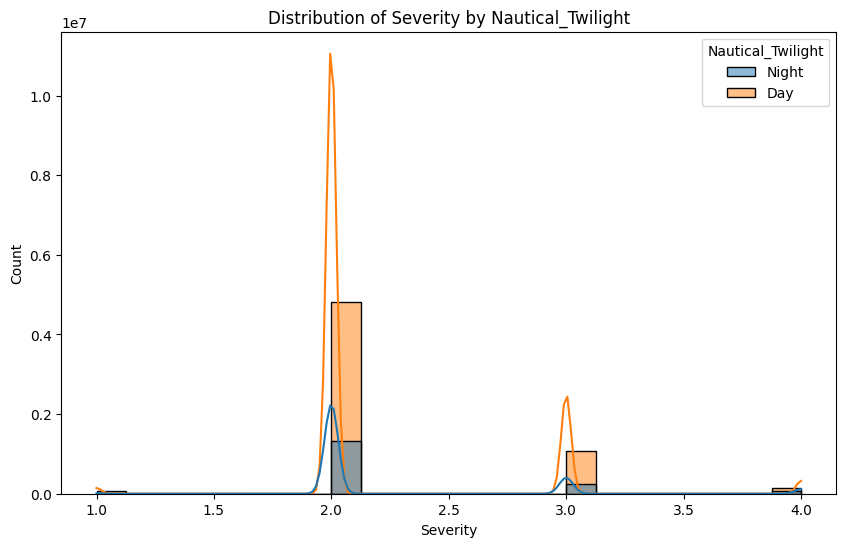

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Severity', hue='Nautical_Twilight', kde=True)
plt.title('Distribution of Severity by Nautical_Twilight')
plt.show()


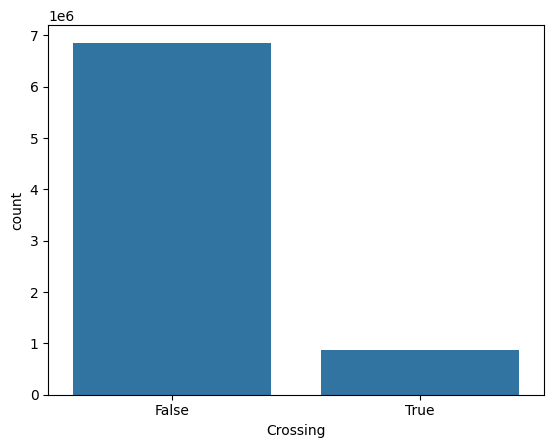

In [21]:
sns.countplot(x='Crossing', data=df)
plt.show()

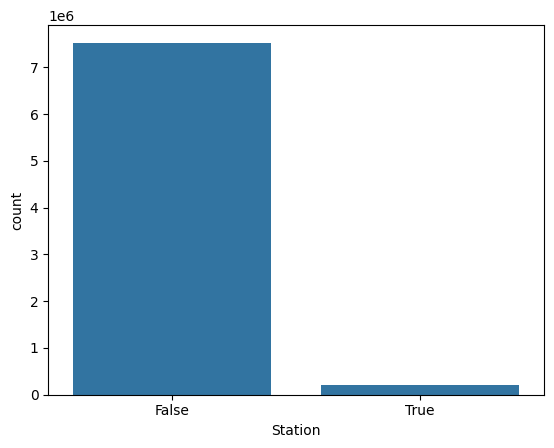

In [22]:
sns.countplot(x='Station', data=df)
plt.show()

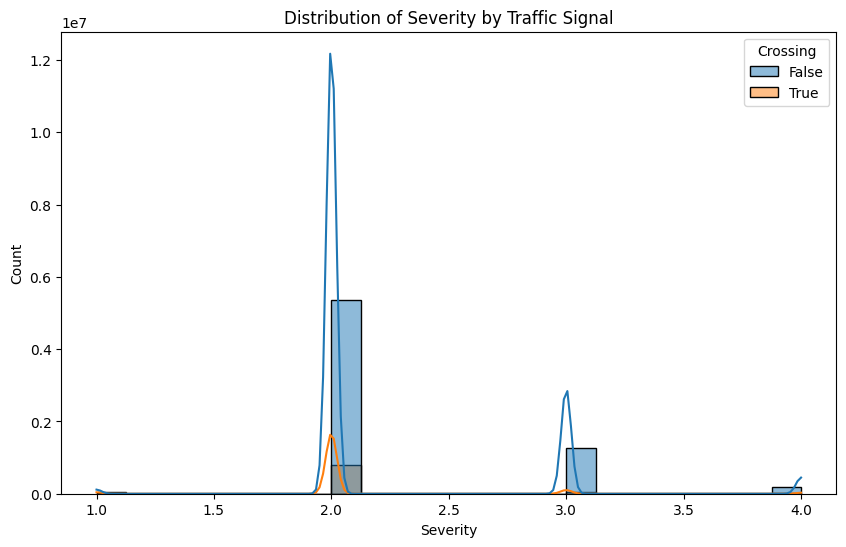

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Severity', hue='Crossing', kde=True)
plt.title('Distribution of Severity by Traffic Signal')
plt.show()


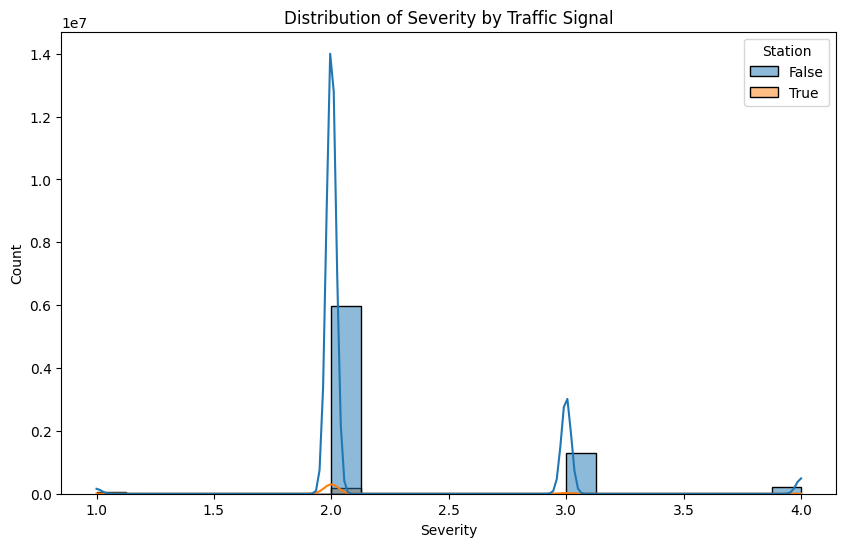

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Severity', hue='Station', kde=True)
plt.title('Distribution of Severity by Traffic Signal')
plt.show()


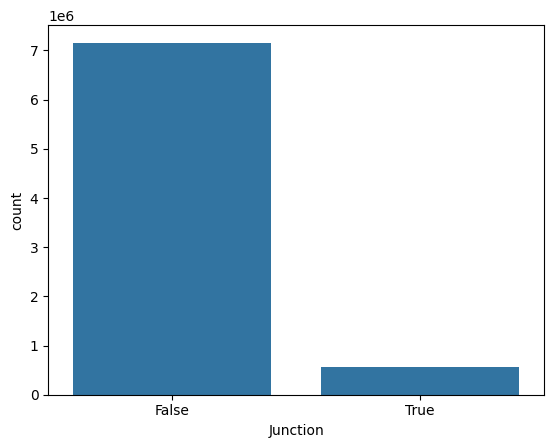

In [25]:
sns.countplot(x='Junction', data=df)
plt.show()

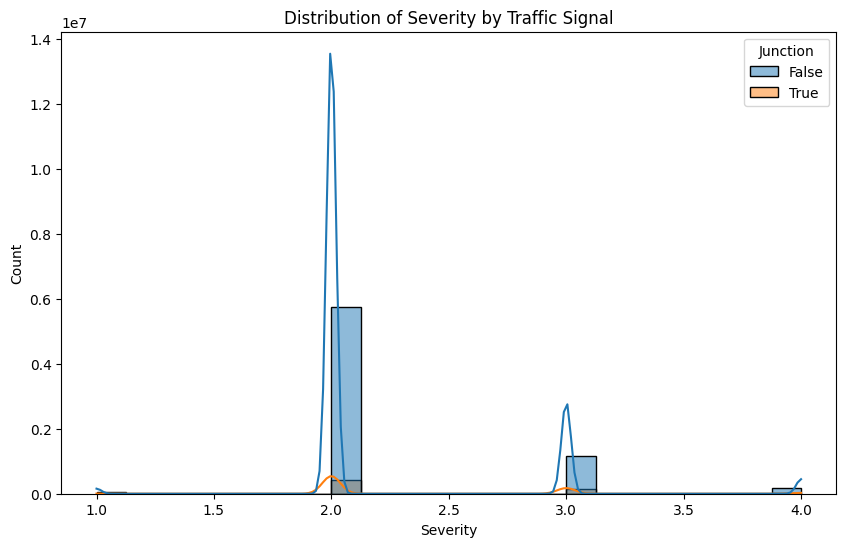

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Severity', hue='Junction', kde=True)
plt.title('Distribution of Severity by Traffic Signal')
plt.show()


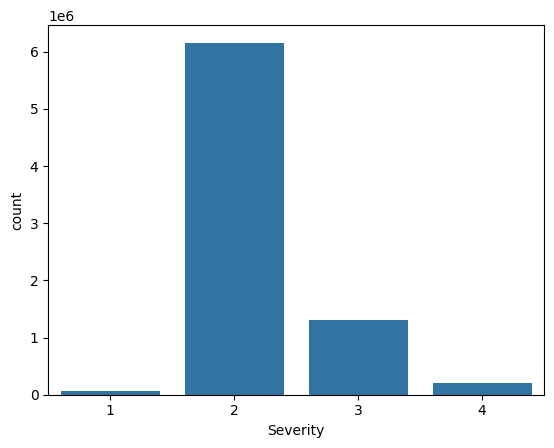

In [27]:
sns.countplot(x='Severity', data=df)
plt.show()

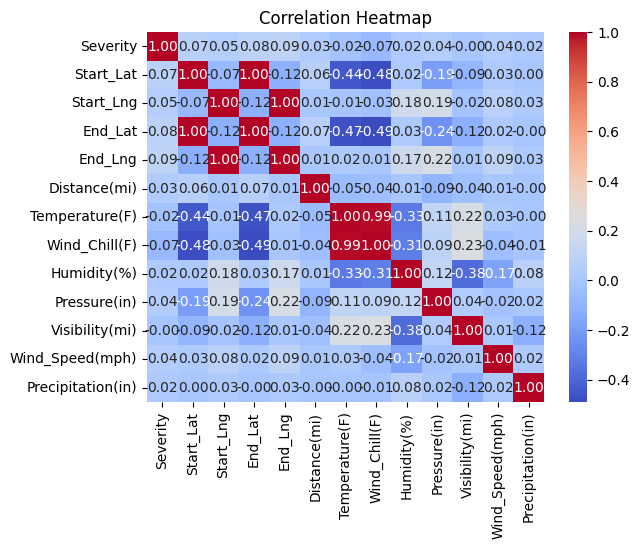

In [28]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_cols].corr()

# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()


# Data Preprocessing
- Loading and cleaning data.
- Handling missing values.
- Feature engineering for enhanced analysis.
- Data Transformation

### Loading and cleaning data.

In [29]:
# List of columns to drop
columns_to_drop = [
    'End_Lat',        # High missing values
    'End_Lng',        # High missing values        
    'Wind_Chill(F)',  # High missing values
    'Precipitation(in)',  # High missing values
    'Turning_Loop',   # Low variance
    'ID',             # Irrelevant
    'Description',    # Irrelevant
    'Weather_Timestamp'  # Irrelevant
]

# Drop the columns from the dataframe
df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Confirm that the columns have been removed
print("Columns after dropping unnecessary features:")
print(df.columns)


Columns after dropping unnecessary features:
Index(['Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Street', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')


In [30]:
df.isnull().sum()

Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
Distance(mi)                  0
Street                    10869
City                        253
County                        0
State                         0
Zipcode                    1915
Country                       0
Timezone                   7808
Airport_Code              22635
Temperature(F)           163853
Humidity(%)              174144
Pressure(in)             140679
Visibility(mi)           177098
Wind_Direction           175206
Wind_Speed(mph)          571233
Weather_Condition        173459
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway                       0
Roundabout                    0
Station                       0
Stop    

### Handling missing values.

In [31]:
# Drop columns with high missing values (>50%)
columns_to_drop = ['Wind_Speed(mph)', 'Airport_Code']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Fill missing values for categorical columns with mode
categorical_cols = ['Street', 'City', 'Zipcode', 'Timezone', 
                    'Wind_Direction', 'Weather_Condition', 
                    'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill missing values for numerical columns with median
numerical_cols = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# Check remaining missing values
print("Remaining missing values per column:")
print(df.isnull().sum())


Remaining missing values per column:
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twili

In [32]:
df.dtypes

Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
Distance(mi)             float64
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Temperature(F)           float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Weather_Condition         object
Amenity                     bool
Bump                        bool
Crossing                    bool
Give_Way                    bool
Junction                    bool
No_Exit                     bool
Railway                     bool
Roundabout                  bool
Station                     bool
Stop                        bool
Traffic_Ca

In [33]:
df.describe

<bound method NDFrame.describe of           Source  Severity           Start_Time             End_Time  \
0        Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1        Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2        Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3        Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4        Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   
...          ...       ...                  ...                  ...   
7728389  Source1         2  2019-08-23 18:03:25  2019-08-23 18:32:01   
7728390  Source1         2  2019-08-23 19:11:30  2019-08-23 19:38:23   
7728391  Source1         2  2019-08-23 19:00:21  2019-08-23 19:28:49   
7728392  Source1         2  2019-08-23 19:00:21  2019-08-23 19:29:42   
7728393  Source1         2  2019-08-23 18:52:06  2019-08-23 19:21:31   

         Start_Lat   Start_Lng  Distance(mi)                     Street  \
0        39.865147  -84.05

In [34]:
# Unique values in the columns
df.nunique()

Source                         3
Severity                       4
Start_Time               6131796
End_Time                 6705355
Start_Lat                2428358
Start_Lng                2482533
Distance(mi)               22382
Street                    336306
City                       13678
County                      1871
State                         49
Zipcode                   825094
Country                        1
Timezone                       4
Temperature(F)               860
Humidity(%)                  100
Pressure(in)                1144
Visibility(mi)                92
Wind_Direction                24
Weather_Condition            144
Amenity                        2
Bump                           2
Crossing                       2
Give_Way                       2
Junction                       2
No_Exit                        2
Railway                        2
Roundabout                     2
Station                        2
Stop                           2
Traffic_Ca

### Feature engineering for enhanced analysis.

In [35]:
# Remove microseconds by stripping them off
df['Start_Time'] = df['Start_Time'].str.split('.', expand=True)[0]
df['End_Time'] = df['End_Time'].str.split('.', expand=True)[0]

# Now convert to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

# Extract additional time features
df['Start_Year'] = df['Start_Time'].dt.year
df['Start_Month'] = df['Start_Time'].dt.month
df['Start_Day'] = df['Start_Time'].dt.day
df['Start_Hour'] = df['Start_Time'].dt.hour
df['Start_Minute'] = df['Start_Time'].dt.minute
df['Start_Second'] = df['Start_Time'].dt.second

df['End_Year'] = df['End_Time'].dt.year
df['End_Month'] = df['End_Time'].dt.month
df['End_Day'] = df['End_Time'].dt.day
df['End_Hour'] = df['End_Time'].dt.hour
df['End_Minute'] = df['End_Time'].dt.minute
df['End_Second'] = df['End_Time'].dt.second

# Drop original Start_Time and End_Time columns if not needed
df.drop(['Start_Time', 'End_Time'], axis=1, inplace=True)


### Data Transformation

In [36]:
from sklearn.preprocessing import LabelEncoder

# Define the columns you want to apply Label Encoding
label_columns = ['Source', 'Severity', 'Country', 'Timezone', 'Wind_Direction', 'Weather_Condition']

# Initialize LabelEncoder
encoder = LabelEncoder()

# Apply Label Encoding to each selected column
for col in label_columns:
    df[col] = encoder.fit_transform(df[col])

# You can now check the transformed DataFrame
print(df.head())


   Source  Severity  Start_Lat  Start_Lng  Distance(mi)  \
0       1         2  39.865147 -84.058723          0.01   
1       1         1  39.928059 -82.831184          0.01   
2       1         1  39.063148 -84.032608          0.01   
3       1         2  39.747753 -84.205582          0.01   
4       1         1  39.627781 -84.188354          0.01   

                      Street          City      County State     Zipcode  ...  \
0                     I-70 E        Dayton  Montgomery    OH       45424  ...   
1                   Brice Rd  Reynoldsburg    Franklin    OH  43068-3402  ...   
2             State Route 32  Williamsburg    Clermont    OH       45176  ...   
3                     I-75 S        Dayton  Montgomery    OH       45417  ...   
4  Miamisburg Centerville Rd        Dayton  Montgomery    OH       45459  ...   

   Start_Day  Start_Hour  Start_Minute  Start_Second  End_Year  End_Month  \
0          8           5            46             0      2016          2   
1   

In [37]:
# Define the binary columns that contain categorical values (like 'Day', 'Night')
binary_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 
                  'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
                  'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight', 
                  'Nautical_Twilight', 'Astronomical_Twilight']

# Mapping for binary categorical values (e.g., 'Day' -> 1, 'Night' -> 0)
binary_mappings = {
    'Day': 1, 'Night': 0,  # Example mapping
    # Add other mappings as necessary, for example:
    # 'True': 1, 'False': 0, 'Yes': 1, 'No': 0, etc.
}

# Apply the mapping to each binary column
for col in binary_columns:
    # Check if the column contains object (string) data
    if df[col].dtype == 'object':
        # Map categorical values to 0/1 and replace NaNs with 0
        df[col] = df[col].map(binary_mappings).fillna(0).astype(int)
    else:
        # If the column already contains numeric values, just convert to int
        df[col] = df[col].astype(int)

# Check the resulting dataframe for the binary columns
print(df[binary_columns].head())


   Amenity  Bump  Crossing  Give_Way  Junction  No_Exit  Railway  Roundabout  \
0        0     0         0         0         0        0        0           0   
1        0     0         0         0         0        0        0           0   
2        0     0         0         0         0        0        0           0   
3        0     0         0         0         0        0        0           0   
4        0     0         0         0         0        0        0           0   

   Station  Stop  Traffic_Calming  Traffic_Signal  Sunrise_Sunset  \
0        0     0                0               0               0   
1        0     0                0               0               0   
2        0     0                0               1               0   
3        0     0                0               0               0   
4        0     0                0               1               1   

   Civil_Twilight  Nautical_Twilight  Astronomical_Twilight  
0               0                  0      

In [38]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to scale
numerical_columns = ['Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)']

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [39]:
# Drop the 'Country' column as it has a single unique value
df.drop(['Country'], axis=1, inplace=True)


In [40]:
# Final check of the preprocessed dataframe
print(df.head())


   Source  Severity  Start_Lat  Start_Lng  Distance(mi)  \
0       1         2   0.721808   0.612004      -0.31058   
1       1         1   0.734201   0.682586      -0.31058   
2       1         1   0.563812   0.613505      -0.31058   
3       1         2   0.698681   0.603560      -0.31058   
4       1         1   0.675046   0.604550      -0.31058   

                      Street          City      County State     Zipcode  ...  \
0                     I-70 E        Dayton  Montgomery    OH       45424  ...   
1                   Brice Rd  Reynoldsburg    Franklin    OH  43068-3402  ...   
2             State Route 32  Williamsburg    Clermont    OH       45176  ...   
3                     I-75 S        Dayton  Montgomery    OH       45417  ...   
4  Miamisburg Centerville Rd        Dayton  Montgomery    OH       45459  ...   

   Start_Day  Start_Hour  Start_Minute  Start_Second  End_Year  End_Month  \
0          8           5            46             0      2016          2   
1   

In [41]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding for 'Street', 'City', 'County' if they are not too high cardinality
label_encoder = LabelEncoder()

# Apply Label Encoding for 'Street', 'City', 'County', and 'Zipcode' (if not too high cardinality)
df['State'] = label_encoder.fit_transform(df['State'])
df['Street'] = label_encoder.fit_transform(df['Street'])
df['City'] = label_encoder.fit_transform(df['City'])
df['County'] = label_encoder.fit_transform(df['County'])
df['Zipcode'] = label_encoder.fit_transform(df['Zipcode'])

# If the above columns are still too large, use Frequency Encoding instead
df['Street'] = df['Street'].map(df['Street'].value_counts() / len(df))
df['City'] = df['City'].map(df['City'].value_counts() / len(df))
df['County'] = df['County'].map(df['County'].value_counts() / len(df))

# Now, you can apply one-hot encoding for the remaining categorical columns if needed
# But use sparse matrices or apply dimensionality reduction


In [42]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 45 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Source                 int32  
 1   Severity               int64  
 2   Start_Lat              float64
 3   Start_Lng              float64
 4   Distance(mi)           float64
 5   Street                 float64
 6   City                   float64
 7   County                 float64
 8   State                  int32  
 9   Zipcode                int32  
 10  Timezone               int32  
 11  Temperature(F)         float64
 12  Humidity(%)            float64
 13  Pressure(in)           float64
 14  Visibility(mi)         float64
 15  Wind_Direction         int32  
 16  Weather_Condition      int32  
 17  Amenity                int32  
 18  Bump                   int32  
 19  Crossing               int32  
 20  Give_Way               int32  
 21  Junction               int32  
 22  No_Exit           

In [43]:

# Split the data into features (X) and target (y)
# Assuming 'Severity' is the target variable
X = df.drop('Severity', axis=1)
y = df['Severity']

In [44]:
from sklearn.model_selection import train_test_split
# Split the dataset
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1667, random_state=42)

# Predictive Modeling:
Training machine learning models to predict accident severity based on features like weather, time, and road conditions.


In [45]:
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Define SMOTE
smote = SMOTE(random_state=42)
X_train_sample = X_train.sample(frac=0.5, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

X_val_sample = X_val.sample(frac=0.5, random_state=42)
y_val_sample = y_val.loc[X_val_sample.index]

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_sample, y_train_sample)
X_val_resampled, y_val_resampled = smote.fit_resample(X_val_sample, y_val_sample)

# Convert the data to DMatrix (XGBoost's internal format)
dtrain = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
dval = xgb.DMatrix(X_val_resampled, label=y_val_resampled)

# Define your parameters including eval_metric
params = {
    'objective': 'multi:softmax',
    'num_class': 4,
    'eval_metric': 'mlogloss',  # Define evaluation metric here
    'max_depth': 15,
    'learning_rate': 0.2,
    'subsample': 1.0,
    'colsample_bytree': 1.0,
    'min_child_weight': 5,
    'gamma': 0.1,
    'scale_pos_weight': [1, 1, 1, 10],
    'random_state': 42
}

# Prepare your training data (dtrain is the DMatrix format of training data)
dtrain = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
dval = xgb.DMatrix(X_val_resampled, label=y_val_resampled)

# Specify the evaluation set
evals = [(dtrain, 'train'), (dval, 'eval')]

# Train the model
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,  # Maximum number of boosting rounds
    evals=evals,           # Evaluation datasets
    early_stopping_rounds=10,  # Stop if no improvement for 10 rounds
    verbose_eval=True      # Print evaluation results at each round
)

C:\Users\Guess\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:44:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-mlogloss:1.10864	eval-mlogloss:1.11651
[1]	train-mlogloss:0.92171	eval-mlogloss:0.93587
[2]	train-mlogloss:0.78494	eval-mlogloss:0.80451
[3]	train-mlogloss:0.68125	eval-mlogloss:0.70551
[4]	train-mlogloss:0.59956	eval-mlogloss:0.62827
[5]	train-mlogloss:0.53421	eval-mlogloss:0.56682
[6]	train-mlogloss:0.48061	eval-mlogloss:0.51670
[7]	train-mlogloss:0.43729	eval-mlogloss:0.47655
[8]	train-mlogloss:0.40004	eval-mlogloss:0.44224
[9]	train-mlogloss:0.37016	eval-mlogloss:0.41531
[10]	train-mlogloss:0.34398	eval-mlogloss:0.39181
[11]	train-mlogloss:0.32171	eval-mlogloss:0.37212
[12]	train-mlogloss:0.30260	eval-mlogloss:0.35536
[13]	train-mlogloss:0.28620	eval-mlogloss:0.34126
[14]	train-mlogloss:0.27172	eval-mlogloss:0.32904
[15]	train-mlogloss:0.25928	eval-mlogloss:0.31863
[16]	train-mlogloss:0.24736	eval-mlogloss:0.30869
[17]	train-mlogloss:0.23729	eval-mlogloss:0.30039
[18]	train-mlogloss:0.22812	eval-mlogloss:0.29296
[19]	train-mlogloss:0.21965	eval-mlogloss:0.28612
[20]	train

### Assessing model performance using metrics such as accuracy and F1 score.

# Evaluation
- Assessing model performance using metrics such as accuracy, F1 score and Confusion Matrix.
- Analyzing feature importance for better interpretability.

In [46]:
from sklearn.metrics import accuracy_score, classification_report 
# Convert test data to DMatrix format for prediction
dtest = xgb.DMatrix(X_test)

# Predict on test data
y_test_pred = model.predict(dtest)

# Evaluate performance using classification report
print(accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

0.9020457015682418
              precision    recall  f1-score   support

           0       0.63      0.79      0.70      6803
           1       0.94      0.94      0.94    615250
           2       0.79      0.78      0.79    130257
           3       0.49      0.42      0.45     20530

    accuracy                           0.90    772840
   macro avg       0.71      0.73      0.72    772840
weighted avg       0.90      0.90      0.90    772840



[[  5342   1201    233     27]
 [  2244 580993  24776   7237]
 [   847  25467 102198   1745]
 [    88  10040   1798   8604]]


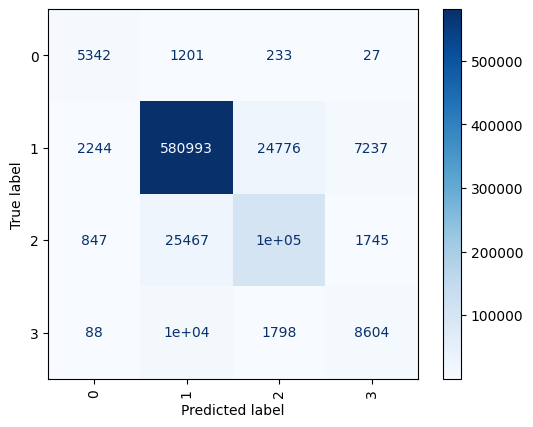

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

# Use the unique class labels from y_test
class_labels = sorted(set(y_test))  # Extract unique labels from y_test

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap="Blues", xticks_rotation="vertical")


### Analyzing feature importance for better interpretability.

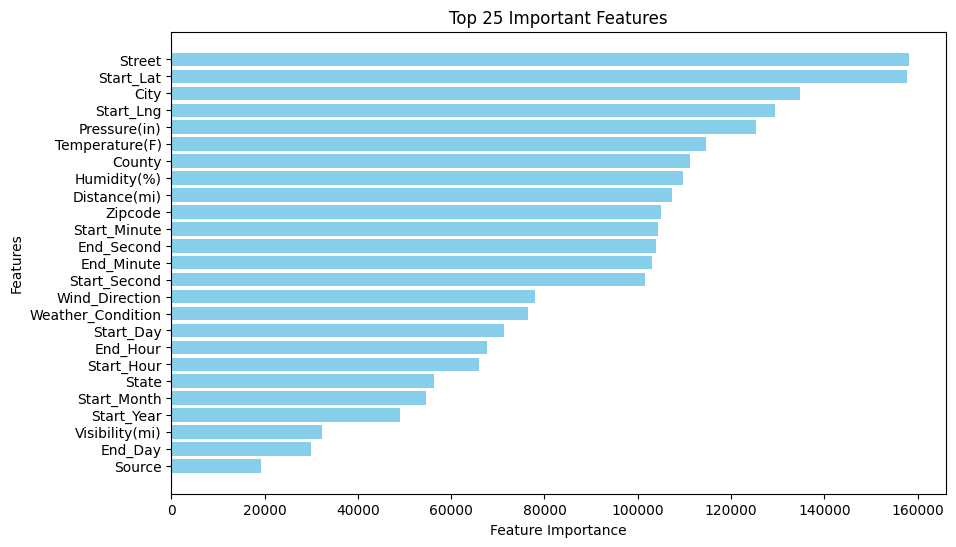

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `model` is an XGBoost Booster object (e.g., from xgb.train())
importances = model.get_score(importance_type='weight')  # You can change 'weight' to 'gain' or 'cover' as well

# Convert the dictionary to a DataFrame
importance_df = pd.DataFrame({
    'Feature': list(importances.keys()),
    'Importance': list(importances.values())
}).sort_values(by='Importance', ascending=False)

# Display top 25 most important features
top_n = 25
top_features = importance_df.head(top_n)

# Plot the top N important features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title(f"Top {top_n} Important Features")
plt.gca().invert_yaxis()  # Invert y-axis to show the most important at the top
plt.show()


In [50]:
import pickle

# Save the model to a .pkl file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
